# Exploratory Data Analysis

In this notebook, we will be importing the data and conducting EDA to evaluate our most pertinent features.

The following code will be processed in [A_eda.py](/py_scripts/A_eda.py). Always remember to update <u>A_eda.py</u> with any updates to this notebook.

In [1]:
# Importing libraries
from pathlib import Path

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
# SAVE_FIG: a function to save any visualizations in the "plots" folder
IMAGES_PATH = Path() / "plots"

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_name}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Importing data
adclicks = pd.read_csv("data/ad_click_dataset.csv")

***

## Overview of Data Structure

We will be examining the data and its underlying structure.

In [4]:
# Examining the top 10 rows
adclicks.head(10)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
5,5942,User5942,NaN,Non-Binary,NaN,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,1
7,5065,User5065,40.0,Male,Mobile,Side,NaN,Evening,0
8,7993,User7993,NaN,Non-Binary,Mobile,Bottom,Social Media,NaN,1
9,4509,User4509,NaN,NaN,NaN,Bottom,Education,Afternoon,1


In [5]:
# More information on features
adclicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In `adclicks.head(10)`, we saw quite a bit of missing information (NaN), and this is confirmed by running `adclicks.info()`.

A summary of `adclicks.info()`:

- There are 10,000 instances.
- `age`, `gender`, `device_type`, `ad_position`, `browsing_history`, and `time_of_day` have missing values.
- Most of the features are non-numeric, possibly categorical.

***

Let's examine what the possible values our non-numerical features have.

In [6]:
# Examine the possible values of non-numeric attributes
display(adclicks["gender"].value_counts())
display(adclicks["device_type"].value_counts())
display(adclicks["ad_position"].value_counts())
display(adclicks["browsing_history"].value_counts())
display(adclicks["time_of_day"].value_counts())

gender
Female        1834
Male          1810
Non-Binary    1663
Name: count, dtype: int64

device_type
Desktop    2754
Mobile     2649
Tablet     2597
Name: count, dtype: int64

ad_position
Bottom    2817
Top       2597
Side      2586
Name: count, dtype: int64

browsing_history
Entertainment    1175
Social Media     1054
Education        1029
Shopping          984
News              976
Name: count, dtype: int64

time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64

With the different value counts of our non-numerical features, we can clearly see that they are intended to be categorical.

Each categorical feature represents the following:

- `gender`: the gender of the user (Male, Female, Non-Binary).
- `device_type`: the type of device of the user when viewing the ad (Mobile, Desktop, Tablet).
- `ad_position`: the position of the ad on the webpage (Top, Side, Bottom).
- `browsing_history`: the user's browsing activity prior to seeing the ad (Shopping, News, Entertainment, Education, Social Media).
- `time_of_day`: the time when the user viewed the ad (Morning, Afternoon, Evening, Night).

Our numerical features represent the following:

- `id`: unique ID for each user.
- `click`: the **target label** indicating whether the user clicked on the ad (Binary).

We will be using the categorical features to predict whether a user will click on an ad (`click`).

Since the `full_name` column as been anonymized and because I feel it is irrelevant, I will be removing it from our analysis.

In [7]:
# Dropping `full_name`
adclicks = adclicks.drop("full_name", axis=1, inplace=False)

***

# Visualizations

Let's visualize the distributions of our features.

## Barplots

Let's plot barplots for each of our categorical features to look at the counts of each category.

In [28]:
# PLOT_CATEGORICAL: a function to plot the categorical features in dataset
def plt_categorical(df):
    # Select the categorical features
    categorical_features = df.select_dtypes(include=["object", "category", "boolean"]).columns
    num_categorical = len(categorical_features)

    # Creating a "square" plot
    sq_rows = math.floor(math.sqrt(num_categorical))
    sq_cols = num_categorical - sq_rows

    # Setting dimensions for figure
    fig, axes = plt.subplots(nrows=sq_rows, ncols=sq_cols, figsize=(5*sq_cols, 4*sq_rows))

    # Configure display for each subplot
    for ax, feature in zip(axes.flatten(), categorical_features):
        # Create a bar plot for each categorical variable
        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Count of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Make empty axes not visible
    for i in range(num_categorical, len(axes.flatten())):
        axes.flatten()[i].set_visible(False)
        
    # Adjust layout
    plt.tight_layout()

In [26]:
# PLT_SHOW: a function to name and save the image of the current plot
def plt_show(plt_name):
    save_fig(plt_name)
    plt.show()

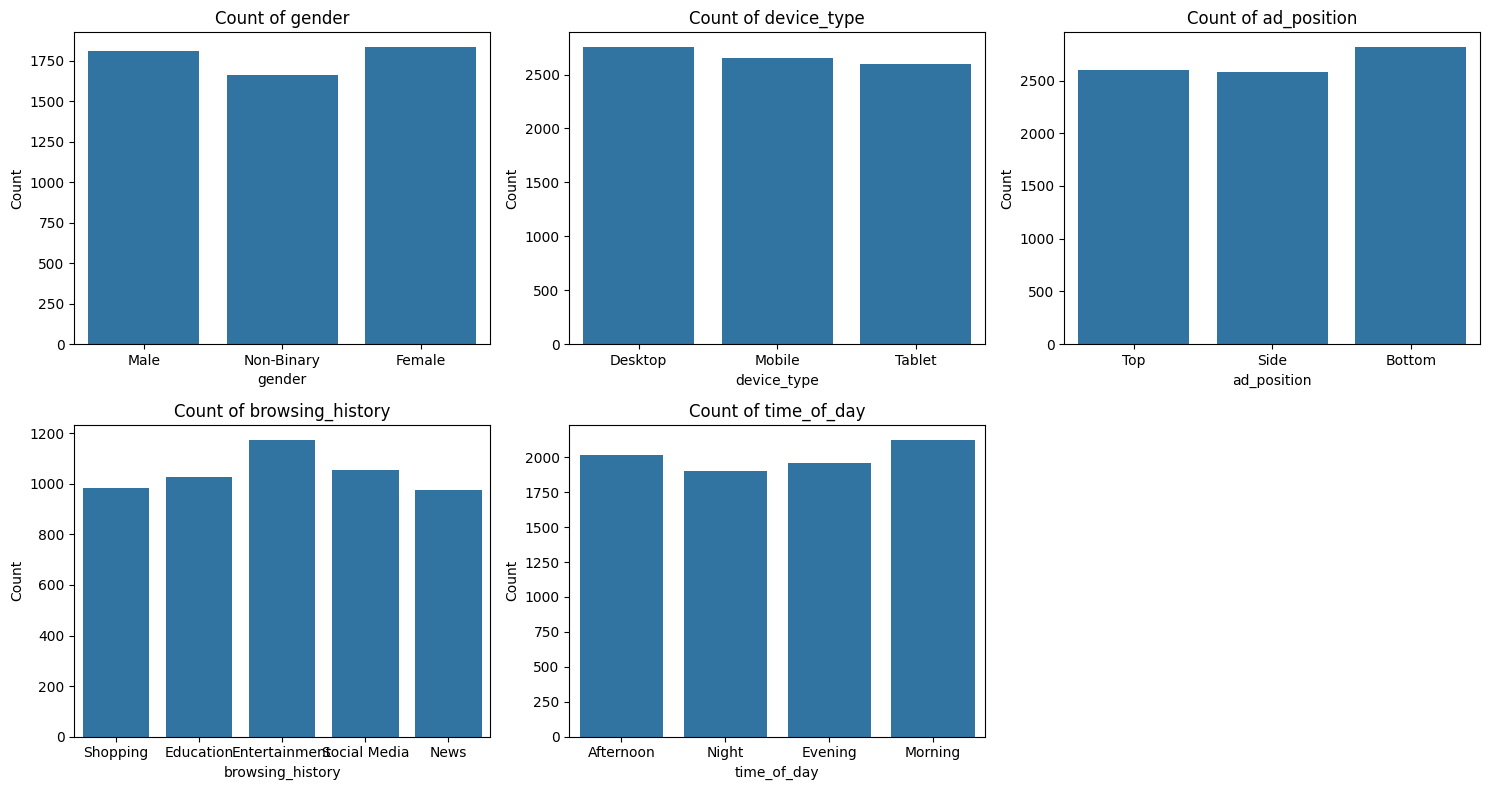

In [29]:
# Plotting barplots for all categorical variables
plt_categorical(adclicks)
plt_show("categorical_bar_plots")

From the plots, we see that most of the categorical features have a uniform distribution, except `browsing_history`, which has a slightly unimodal distribution. This information will be useful for dealing with missing data in these categories.

## Distribution of AGE